Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


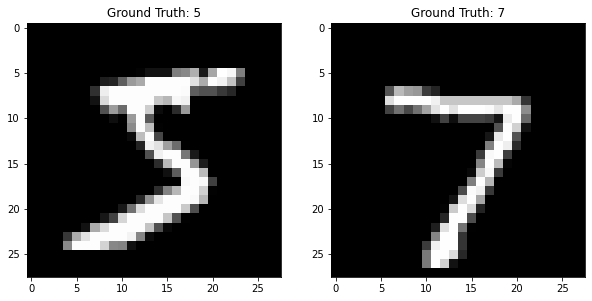

In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### PREPARE DATA

#60 000 train samples, 10 000 test samples
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)

plt.figure(figsize=[10,5])

plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_labels[0]))


#preprocessing before feeding to the network
dim_data = np.prod(train_images.shape[1:])

#change from matrix to an array and to a float datatype
train_data = train_images.reshape(train_images.shape[0], dim_data).astype('float32')
test_data = test_images.reshape(test_images.shape[0], dim_data).astype('float32')

#change label from int to categorical data for one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print(train_labels[0])
print(train_labels_one_hot[0])

In [62]:
### FEED THE NETWORK (input, 2 hidden layers with 512 units, output with 10 units)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#apply the layers + Dropout as REGULARIZATION
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dropout(0.99))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.99))
model.add(Dense(len(classes), activation='softmax'))

#configure the network
#categorical cross entropy which is used for multiclass classification
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#at this point the network is ready to be trained
#the whole dataset is fed 20 times to the network
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))
#fit() function returns a history object which has a dictionary of all 
#the metrics which were required to be tracked during training

Epoch 1/20
235/235 [==============================] - 5s 19ms/step - loss: 969.2818 - accuracy: 0.1020 - val_loss: 2.5801 - val_accuracy: 0.1044
Epoch 2/20
235/235 [==============================] - 5s 19ms/step - loss: 10.0872 - accuracy: 0.1122 - val_loss: 2.4159 - val_accuracy: 0.1080
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 6.3040 - accuracy: 0.1133 - val_loss: 2.3558 - val_accuracy: 0.1105
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 4.5457 - accuracy: 0.1108 - val_loss: 2.3414 - val_accuracy: 0.1136
Epoch 5/20
235/235 [==============================] - 7s 30ms/step - loss: 3.8465 - accuracy: 0.1118 - val_loss: 2.3258 - val_accuracy: 0.1135
Epoch 6/20
235/235 [==============================] - 6s 28ms/step - loss: 3.4248 - accuracy: 0.1122 - val_loss: 2.3192 - val_accuracy: 0.1133
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 3.5334 - accuracy: 0.1120 - val_loss: 2.3164 - val_accuracy: 0.1

In [49]:
#evaluate, check the performance
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.6733 - accuracy: 0.9746
Evaluation result on Test Data : Loss = 0.6733455061912537, accuracy = 0.9746000170707703


Text(0.5, 1.0, 'Accuracy Curves')

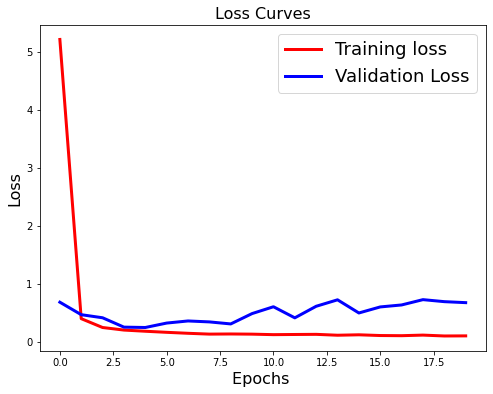

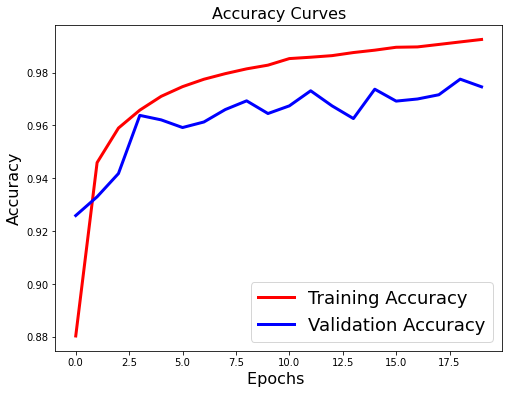

In [52]:
### CHECK FOR OVERFITTING 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

# substantial difference between the training and test accuracy = sign of Overfitting 
# means that the network has memorized the training data very well, but is not guaranteed to work on unseen data
# can be fixed with REGULARIZATION -the model has better 
# generalization capability as the performance does not decrease drastically in case of unseen data also

Model prediction: 2


Text(0.5, 1.0, 'Ground Truth : 2')

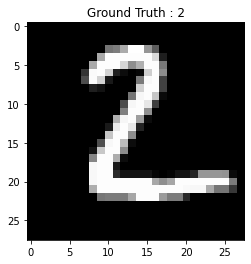

In [56]:
### PREDICT
# print("Model prediction: {}".format(model.predict_classes(test_data[[1],:])[0]))
print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])[0]), axis=-1))


# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))

In [58]:
### GET PROBABILITIES

#gives the probability/confidence score for each class
#confidence of nr 7 is equal to 1
model.predict(test_data[[0],:])

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 9.091233e-36,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)